In [48]:
import os
import cv2
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [49]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [50]:
num_of_img = 0
overenhancement_img_dir = './image_analysis/overenhancement/'
normal_img_dir = './image_analysis/normal/'
low_img_dir = './image_analysis/low/'

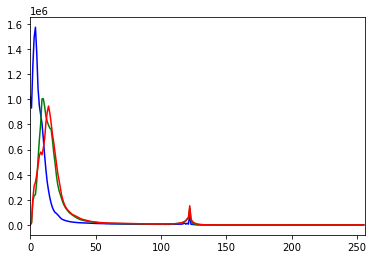

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./image_analysis/paper_use/148.jpg')

# 畫出 RGB 三種顏色的分佈圖
color = ('b','g','r')
for i, col in enumerate(color):
  histr = cv2.calcHist([img],[i],None,[256],[0, 256])
  plt.plot(histr, color = col)
  plt.xlim([0, 256])
plt.show()

In [ ]:
# 正常亮度圖像的平均亮度分佈
normal_brightness_distribution = np.zeros(256)
for index, file in enumerate(os.listdir(normal_img_dir)):
    img_path = normal_img_dir + file
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    mean = int(np.mean(img))
    normal_brightness_distribution[mean]+=1
    if index != 0:
        if index == num_of_img: break  

In [ ]:
# 低光圖像的平均亮度分佈
low_brightness_distribution = np.zeros(256)
for index, file in enumerate(os.listdir(low_img_dir)):
    img_path = low_img_dir + file
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    mean = int(np.mean(img))
    low_brightness_distribution[mean]+=1
    if index != 0:
        if index == num_of_img: break  

## 低光影像與正常影像亮度分佈圖

In [ ]:
index = np.arange(0,256)
tick = np.arange(0,256,5)
plt.figure(figsize=(50,25))
plt.bar( index, normal_brightness_distribution, color='blue')
plt.bar( index, low_brightness_distribution, color='red')
plt.xticks(ticks=tick)
plt.show()

## 低光影像與正常影像顏色分佈

In [ ]:
normal_red_distribution = np.zeros(256)
normal_blue_distribution = np.zeros(256)
normal_green_distribution = np.zeros(256)

low_red_distribution = np.zeros(256)
low_blue_distribution = np.zeros(256)
low_green_distribution = np.zeros(256)

for index, file in enumerate(os.listdir(normal_img_dir)):
    img_path = normal_img_dir + file
    img = cv2.imread(img_path)
    b, g, r = cv2.split(img)
    
    r_mean = int(np.mean(r))
    g_mean = int(np.mean(g))
    b_mean = int(np.mean(b))
    
    normal_red_distribution[r_mean]+=1
    normal_blue_distribution[b_mean]+=1
    normal_green_distribution[g_mean]+=1
    
    if index != 0:
        if index == num_of_img: break

for index, file in enumerate(os.listdir(low_img_dir)):
    img_path = low_img_dir + file
    img = cv2.imread(img_path)
    b, g, r = cv2.split(img)
    
    r_mean = int(np.mean(r))
    g_mean = int(np.mean(g))
    b_mean = int(np.mean(b))
    
    low_red_distribution[r_mean]+=1
    low_blue_distribution[b_mean]+=1
    low_green_distribution[g_mean]+=1
    
    if index != 0:
        if index == num_of_img: break

In [ ]:
index = np.arange(0,256)
tick = np.arange(0,256,5)

plt.figure(figsize=(50,25))

plt.bar( index, normal_red_distribution, color='red')
plt.bar( index, normal_blue_distribution, color='blue')
plt.bar( index, normal_green_distribution, color='green')

plt.bar( index, low_red_distribution, color='red')
plt.bar( index, low_blue_distribution, color='blue')
plt.bar( index, low_green_distribution, color='green')

plt.xticks(ticks=tick)
plt.show()

# 差值

In [66]:
normal_red_distribution = np.zeros(256)
normal_blue_distribution = np.zeros(256)
normal_green_distribution = np.zeros(256)

for index, file in enumerate(os.listdir(normal_img_dir)):
    img_path = normal_img_dir + file
    img = cv2.imread(img_path)
    if img is None:
        continue
    b, g, r = cv2.split(img)
    
    
    # r_g = int(np.abs(np.mean(r*0.299-g*0.587)))
    # r_b = int(np.abs(np.mean(r*0.299-b*0.114)))
    # g_b = int(np.abs(np.mean(g*0.587-b*0.114)))
    
    r_g = int(np.abs(np.mean(r-g)))
    r_b = int(np.abs(np.mean(r-b)))
    g_b = int(np.abs(np.mean(g-b)))
    
    normal_red_distribution[r_g]+=1
    normal_blue_distribution[r_b]+=1
    normal_green_distribution[g_b]+=1
    
    if index != 0:
        if index == num_of_img: break

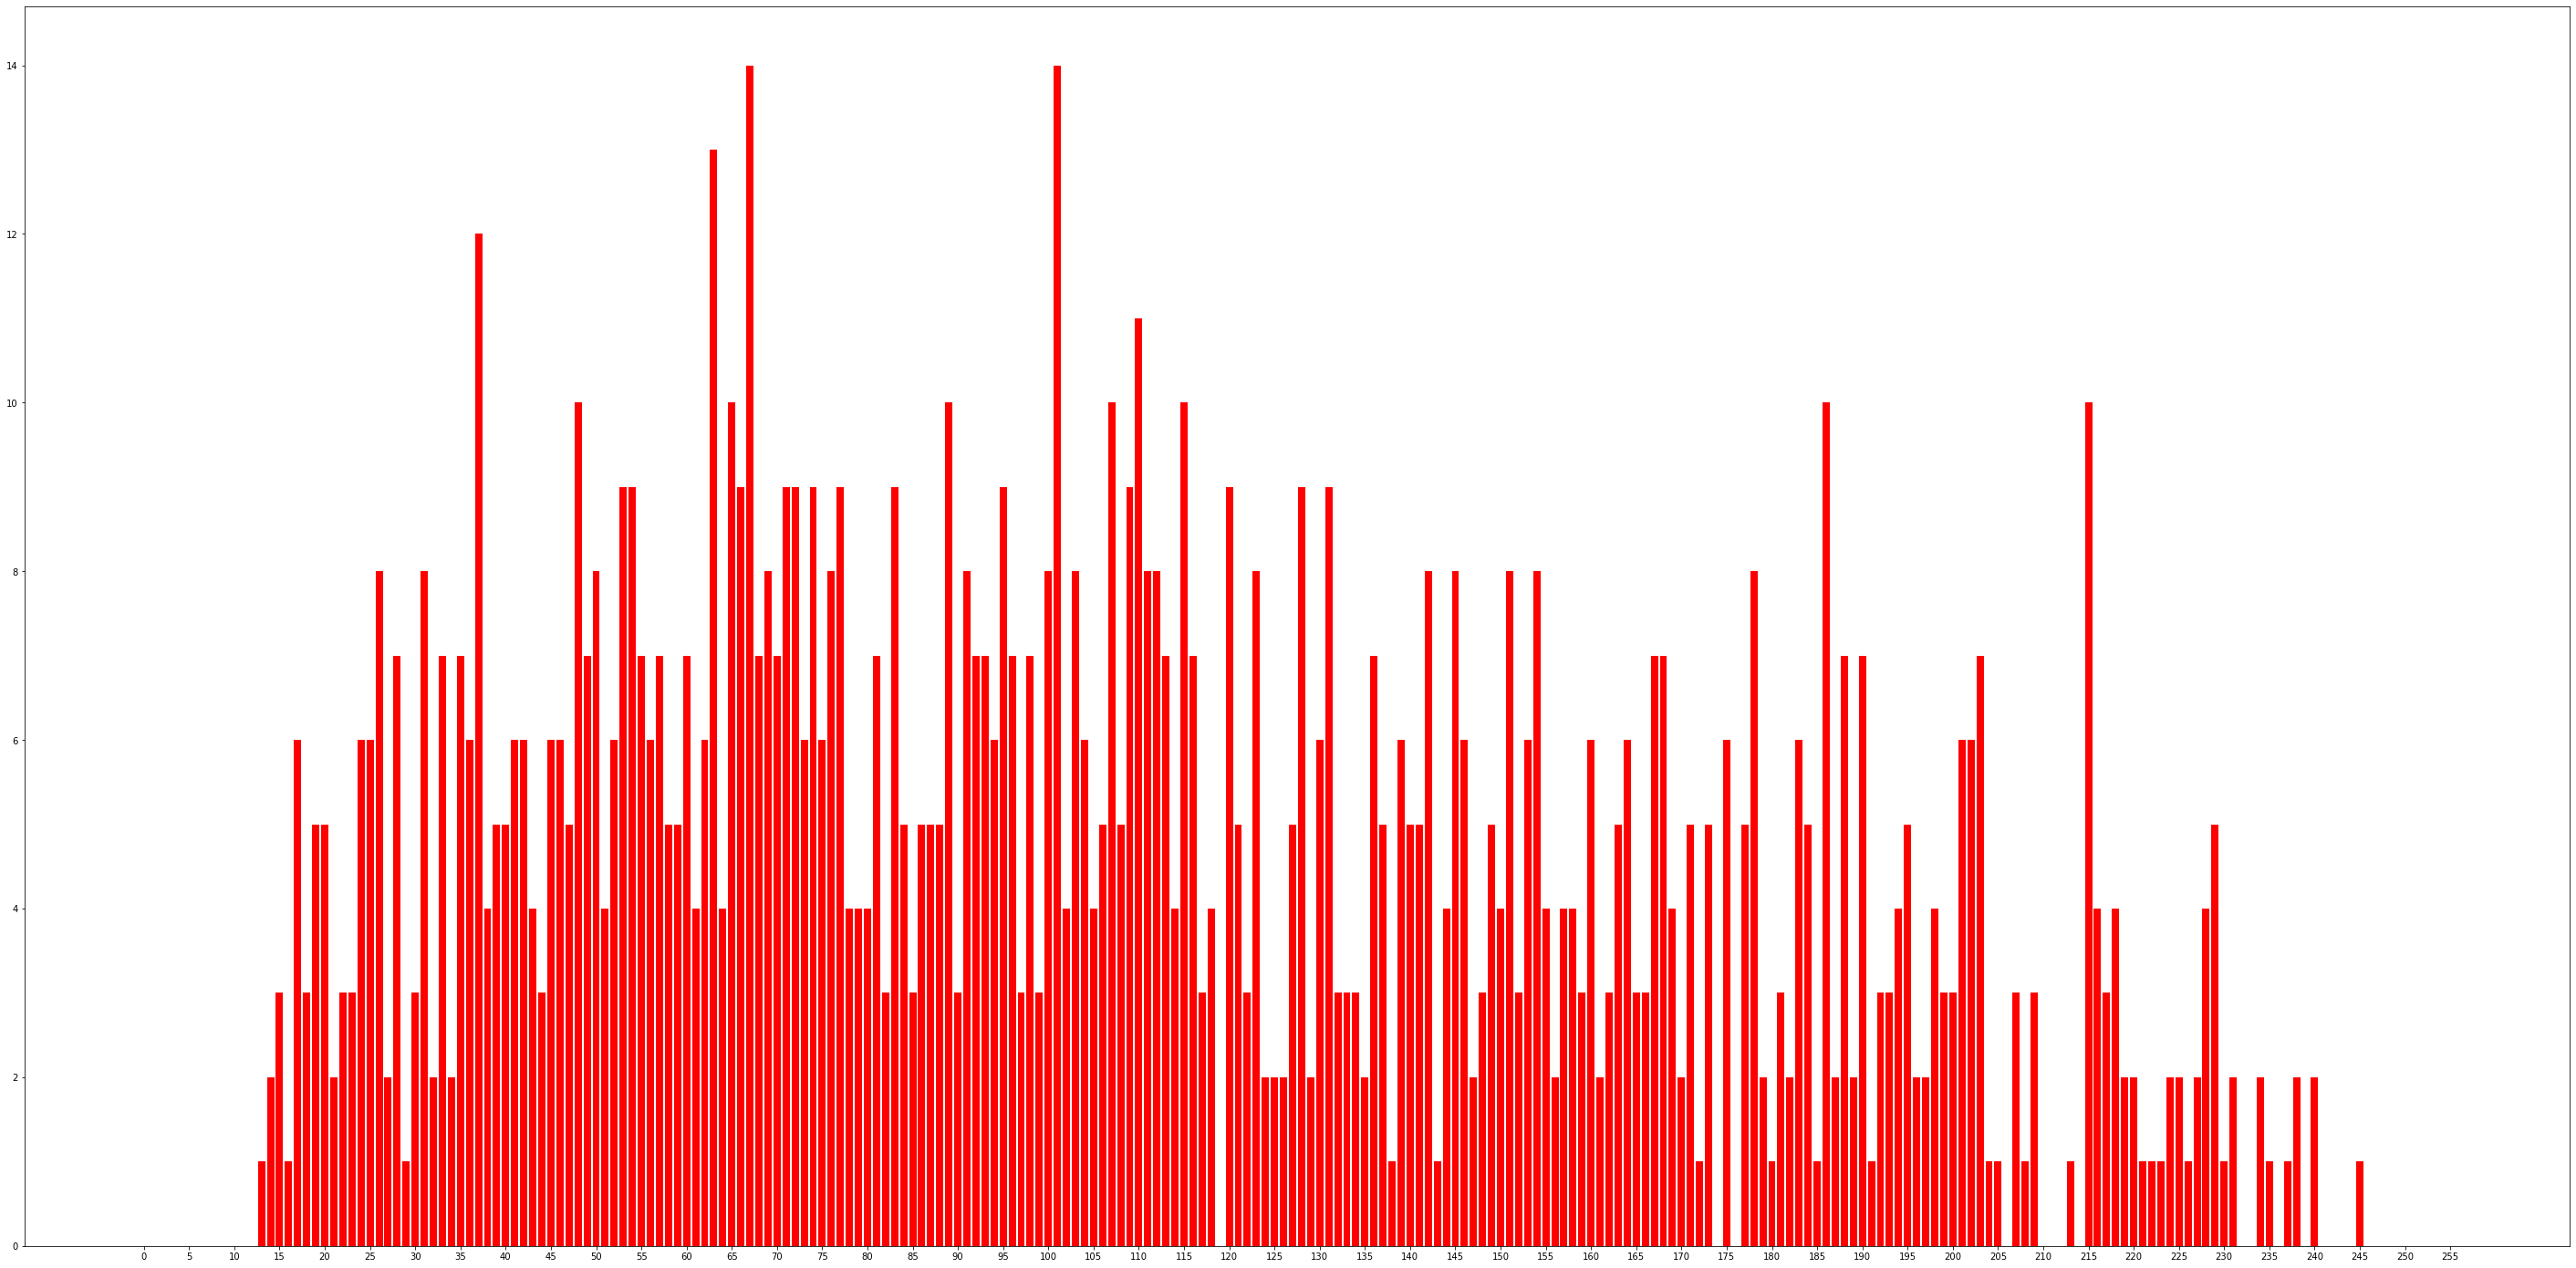

In [69]:
index = np.arange(0,256)
tick = np.arange(0,256,5)

plt.figure(figsize=(50,25))

plt.bar( index, normal_red_distribution, color='red')
# plt.bar( index, normal_blue_distribution, color='blue')
# plt.bar( index, normal_green_distribution, color='green')

plt.xticks(ticks=tick)
plt.show()

## 低光影像與正常影像飽和度分佈

In [ ]:
overenhancement_hue_distribution = np.zeros(256)
overenhancement_saturation_distribution = np.zeros(256)
overenhancement_lightness_distribution = np.zeros(256)

normal_hue_distribution = np.zeros(256)
normal_saturation_distribution = np.zeros(256)
normal_lightness_distribution = np.zeros(256)

low_hue_distribution = np.zeros(256)
low_saturation_distribution = np.zeros(256)
low_lightness_distribution = np.zeros(256)

num_of_img = 10

# for index, file in enumerate(os.listdir(normal_img_dir)):
#     img_path = normal_img_dir + file
#     img = cv2.imread(img_path)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
#     h, s, v = cv2.split(img)
    
#     h_mean = int(np.mean(h))
#     s_mean = int(np.mean(s))
#     v_mean = int(np.mean(v))
    
#     normal_hue_distribution[h_mean]+=1
#     normal_saturation_distribution[s_mean]+=1
#     normal_lightness_distribution[v_mean]+=1
    
#     if index != 0:
#         if index == num_of_img: break

# for index, file in enumerate(os.listdir(low_img_dir)):
#     img_path = low_img_dir + file
#     img = cv2.imread(img_path)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#     h, s, v = cv2.split(img)
#     h_mean = int(np.mean(h))
#     s_mean = int(np.mean(s))
#     v_mean = int(np.mean(v))
    
#     low_hue_distribution[h_mean]+=1
#     low_saturation_distribution[s_mean]+=1
#     low_lightness_distribution[v_mean]+=1
    
#     if index != 0:
#         if index == num_of_img: break
        
for index, file in enumerate(os.listdir(overenhancement_img_dir)):
    img_path = overenhancement_img_dir + file
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    h, s, v = cv2.split(img)
    print(h)
    print(np.mean(h))
    
    h_mean = int(np.mean(h))
    s_mean = int(np.mean(s))
    v_mean = int(np.mean(v))
    
    overenhancement_hue_distribution[h_mean]+=1
    overenhancement_saturation_distribution[s_mean]+=1
    overenhancement_lightness_distribution[v_mean]+=1
    
    if index != 0:
        if index == num_of_img: break

In [ ]:
index = np.arange(0,256)
x_tick = np.arange(0,256,5)
y_tick = np.arange(0,50,1)

plt.figure(figsize=(50,25))
plt.bar( index, overenhancement_hue_distribution, color='red')
# plt.bar( index, overenhancement_saturation_distribution, color='orange')
# plt.bar( index, overenhancement_lightness_distribution, color='green')
plt.xticks(ticks=x_tick)
plt.yticks(ticks=y_tick)
plt.show()

# plt.figure(figsize=(50,25))
# # plt.bar( index, normal_hue_distribution, color='red')
# plt.bar( index, normal_saturation_distribution, color='blue')
# # plt.bar( index, normal_lightness_distribution, color='green')
# plt.xticks(ticks=x_tick)
# plt.yticks(ticks=y_tick)
# plt.show()

# plt.figure(figsize=(50,25))
# # plt.bar( index, low_hue_distribution, color='red')
# plt.bar( index, low_saturation_distribution, color='pink')
# # plt.bar( index, low_lightness_distribution, color='green')
# plt.xticks(ticks=x_tick)
# plt.yticks(ticks=y_tick)
# plt.show()



## 低光影像與正常影像 去除Y(亮度)後， 顏色的是否有差異

In [ ]:
for i in range(10):
    low = './image_analysis/low/{0}.JPG'.format(i+1)
    normal = './image_analysis/normal/{0}.JPG'.format(i+20)
    path = [low, normal]
    print('image: {0}'.format(i))
    
    former_cr = 0
    former_cb = 0
    for index, j in enumerate(path):
        img =  cv2.imread(j)
        
        Ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)

        y, cr, cb = cv2.split(Ycrcb)

        if index == 0:
            print('low: {0}'.format(np.mean(cr/cb)))
        else:
            print('nor: {0}'.format(np.mean(cr/cb)))    
    print()

In [ ]:
dir_index = 1
for i in range(7):
    low = './image/{0}/origin_Image.png'.format(dir_index)
    enh = './image/{0}/{1}.jpg'.format(dir_index, i)
    path = [low, enh]
    print('image: {0}'.format(i))
    
    former_sum = 0
    former_mean_cr = 0
    former_mean_cb = 0
    for index, j in enumerate(path):
        img =  cv2.imread(j)
        
        Ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
        y, cr, cb = cv2.split(Ycrcb)
        
        mean_cr = np.mean(cr)
        mean_cb = np.mean(cb)
        sum = mean_cr + mean_cb
        
        if index == 0:
            former_mean_cb = mean_cb
            former_mean_cr = mean_cr    
            former_sum = sum
            print('{0} - sum: {1:6f}, mean_cr: {2:6f}, mean_cb: {3:6f}'.format('org' ,sum, mean_cr, mean_cb))
        else:
            former_sum =np.abs(former_sum - sum)
            former_mean_cr = np.abs(former_mean_cr - mean_cr)
            former_mean_cb = np.abs(former_mean_cb - mean_cb)
            print('{0} - sum: {1:6f}, mean_cr: {2:6f}, mean_cb: {3:6f}'.format('enh' ,sum, mean_cr, mean_cb))
            print('l-n - sum: {0:6f},   mean_cr: {1:6f},   mean_cb: {2:6f}'.format(former_sum, former_mean_cr, former_mean_cb))
        
    print()

## 顏色差異

In [ ]:
num_of_img = 10
dir_index = 1
normal_img_dir = ['./image/{0}/origin_Image.png'.format(dir_index),
                  './image/{0}/0.jpg'.format(dir_index),
                  './image/{0}/1.jpg'.format(dir_index),
                  './image/{0}/2.jpg'.format(dir_index),
                  './image/{0}/3.jpg'.format(dir_index),
                  './image/{0}/4.jpg'.format(dir_index),
                  './image/{0}/5.jpg'.format(dir_index),
                  './image/{0}/6.jpg'.format(dir_index),
                  './image/{0}/7.jpg'.format(dir_index),
                  './image/{0}/exposure-fusion.jpg'.format(dir_index)]

scale_rg_o = 0
scale_rb_o = 0
scale_gb_o = 0
# for index, file in enumerate(os.listdir(normal_img_dir)):
    #img_path = normal_img_dir + file
for index, i in enumerate(normal_img_dir):
    img_path = i
    img = cv2.imread(img_path)/255
    
    b, g, r = cv2.split(img)
    
    mean_r = np.mean(r)
    mean_g = np.mean(g)
    mean_b = np.mean(b)
    

    scale_rg = mean_r / mean_g
    scale_rb = mean_r / mean_b
    scale_gb = mean_g / mean_b
    # print(scale_rg, scale_rb, scale_gb)
    
    if index == 0:
        scale_rg_o = scale_rg 
        scale_rb_o = scale_rb
        scale_gb_o = scale_gb
    if index != 0:
        print('Enhancemnet_img{0}: {1:6f} {2:6f} {3:6f}'.format(index, np.abs(scale_rg_o-scale_rg), np.abs(scale_rb_o-scale_rb), np.abs(scale_gb_o-scale_gb)))

    Drg = np.math.pow(mean_r - mean_g, 2)
    Drb = np.math.pow(mean_r - mean_b, 2)
    Dgb = np.math.pow(mean_g - mean_b, 2)
    
    # print('{0:6f} {1:6f} {2:6f}'.format(Drg, Drb, Dgb))
    if index == 0:
        print('Origin_Image    : {0:6f}'.format(Drg+Drb+Dgb))
    elif index !=9 and index != 0:
        print('Enhancement_img{0}: {1:6f}'.format(index, Drg+Drb+Dgb))
    else:
        print('Exposure_fusion : {0:6f}'.format(Drg+Drb+Dgb))
    print()
    if index != 0:
        if index == num_of_img: break

In [ ]:
for i in range(10):
    normal_img_dir = ['./image_analysis/low/{0}.JPG'.format(i+1),
                      './image_analysis/normal/{0}.JPG'.format(i+5)]
    scale_rg_o = 0
    scale_rb_o = 0
    scale_gb_o = 0

    for index, img_path in enumerate(normal_img_dir):

        img = cv2.imread(img_path)/255
        
        b, g, r = cv2.split(img)
        
        mean_r = np.mean(r)
        mean_g = np.mean(g)
        mean_b = np.mean(b)
        

        scale_rg = mean_r / mean_g + mean_r
        scale_rb = mean_r / mean_b + mean_r
        scale_gb = mean_g / mean_b + mean_g
        
        if index == 0:
            scale_rg_o = scale_rg 
            scale_rb_o = scale_rb
            scale_gb_o = scale_gb
        if index != 0:
            print('result: {0:6f} {1:6f} {2:6f}'.format(np.abs(scale_rg_o-scale_rg), np.abs(scale_rb_o-scale_rb), np.abs(scale_gb_o-scale_gb)))
            print('sum: {}'.format(np.abs(scale_rg_o-scale_rg) + np.abs(scale_rb_o-scale_rb) + np.abs(scale_gb_o-scale_gb)))
            

        # Drg = np.math.pow(mean_r - mean_g, 2)
        # Drb = np.math.pow(mean_r - mean_b, 2)
        # Dgb = np.math.pow(mean_g - mean_b, 2)
        
        # # print('{0:6f} {1:6f} {2:6f}'.format(Drg, Drb, Dgb))
        # if index == 0:
        #     print('low_d: {0:6f}'.format(Drg+Drb+Dgb))
        # else:
        #     print('nor_d: {0:6f}'.format(Drg+Drb+Dgb))
    print()

## 偏色檢測

In [ ]:
def Image_color_cast_detection(img):
    lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l,a,b = cv2.split(lab_img)

    h,w,_ = np.shape(lab_img)

    da = np.sum(a)/(h * w) - 128
    db = np.sum(b)/(h * w) - 128

    histA = [0] * 256
    histB = [0] * 256

    for i in range(h):
        for j in range(w):
            ta = a[i][j]
            tb = b[i][j]
            histA[ta] += 1
            histB[tb] += 1

    msqA = 0
    msqB = 0

    for y in range(256):
        msqA += np.float32(np.abs(y - 128 - da) * histA[y] / (w * h))
        msqB += np.float32(np.abs(y - 128 - db) * histB[y] / (w * h))
        
    result = np.math.sqrt(da * da + db * db) / np.math.sqrt(msqA * msqA + msqB * msqB)
    print("d/m = {0}".format(result))

In [ ]:
# for index, file in enumerate(os.listdir(low_img_dir)):
#     img_path = low_img_dir + file
#     print(img_path)
#     img = cv2.imread(img_path)
#     Image_color_cast_detection(img)
#     if index != 0:
#         if index == num_of_img: break  

In [ ]:
# for index, file in enumerate(os.listdir(normal_img_dir)):
#     img_path = normal_img_dir + file
#     print(img_path)
#     img = cv2.imread(img_path)
#     Image_color_cast_detection(img)
#     if index != 0:
#         if index == num_of_img: break  